### LOGISTIC REGRESSION

#### 1. Data Exploration:

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

##### a. Load the dataset and perform exploratory data analysis (EDA).

In [218]:
df = pd.read_csv("diabetes.csv")

In [219]:
df.shape

(768, 9)

In [220]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [222]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [223]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


##### b. Examine the features, their types, and summary statistics.

##### c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

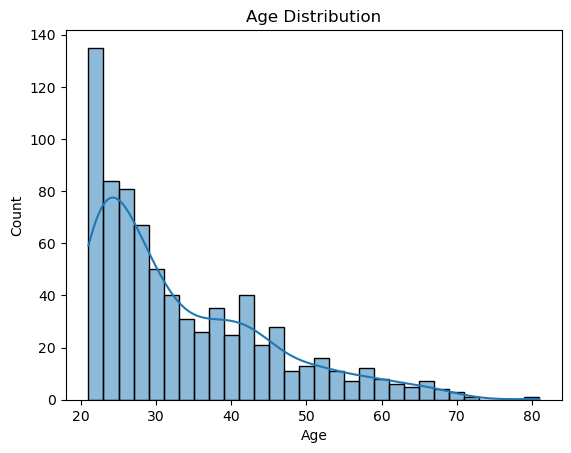

In [224]:
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

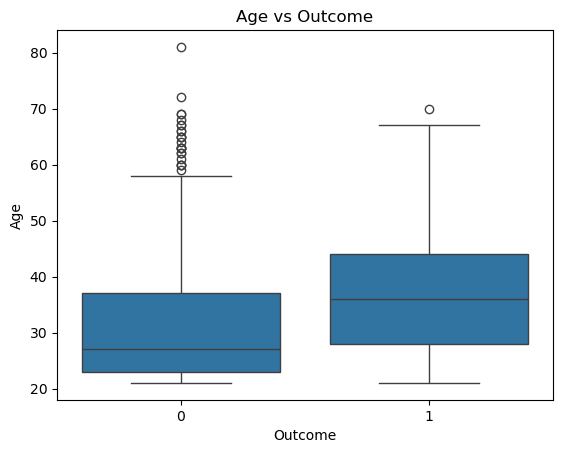

In [225]:
sns.boxplot(x='Outcome', y='Age', data=df[['Age','Outcome']])
plt.title("Age vs Outcome")
plt.show()

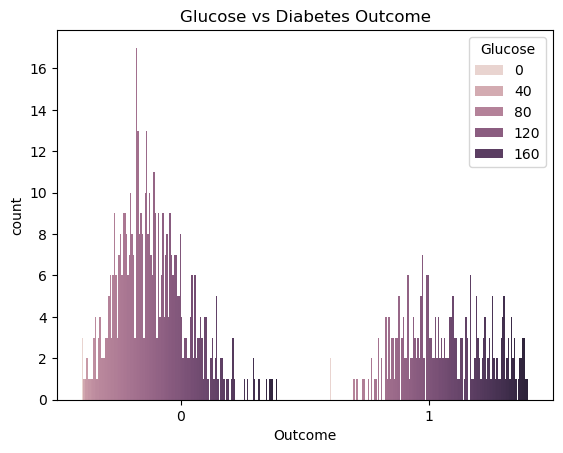

In [226]:
sns.countplot(x='Outcome', hue='Glucose', data=df[['Glucose','Outcome']])
plt.title("Glucose vs Diabetes Outcome")
plt.show()

##### Analyze any patterns or correlations observed in the data.

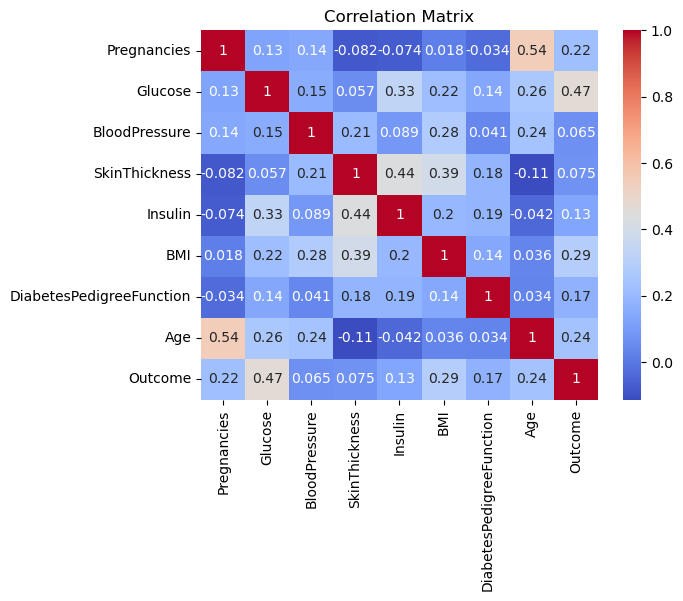

In [227]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

#### 2. Data Preprocessing:

##### a. Handle missing values (e.g., imputation).

In [228]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [229]:
df.duplicated().sum()

np.int64(0)

In [230]:
X=df[df.columns[:-1]]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [231]:
df.columns[-1] == 1
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [232]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [233]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [234]:
le.classes_

array([0, 1])

In [235]:
le.transform(y_train)


array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

#### 3. Model Building:

##### a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

##### b. Train the model using the training data.

In [236]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### 4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.


In [237]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [238]:
accuracy_score(y_test, y_pred)

0.7142857142857143

In [239]:
precision_score(y_test, y_pred)

0.6086956521739131

In [240]:
recall_score(y_test, y_pred)

0.5185185185185185

In [241]:
f1_score(y_test, y_pred)

0.56

In [242]:
roc_auc_score(y_test, y_prob)

np.float64(0.8229629629629629)

##### Visualize the ROC curve.`

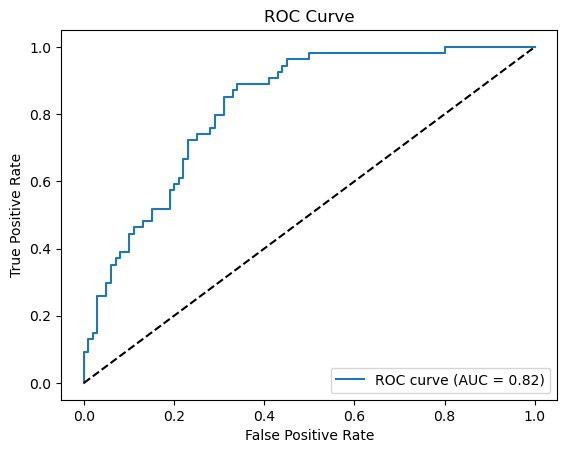

In [243]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC curve (AUC = %.2f)" % roc_auc_score(y_test, y_prob))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()

#### 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.


###### b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [244]:
coeff_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
print(coeff_df.sort_values(by="Coefficient", ascending=False))

                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.706117
0               Pregnancies     0.114125
5                       BMI     0.092725
1                   Glucose     0.036935
7                       Age     0.015525
3             SkinThickness     0.004523
4                   Insulin    -0.001244
2             BloodPressure    -0.011166


#### 6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions


In [245]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [246]:
import streamlit as st
import pickle
import joblib
import warnings
warnings.filterwarnings('ignore')

In [247]:
joblib.dump((scaler, model), "logistic_model.pkl")

['logistic_model.pkl']

In [248]:
scaler, model = joblib.load("logistic_model.pkl")

st.title("🩺 Diabetes Prediction App")
st.write("Enter the values below to check the probability of diabetes.")

pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=1)
glucose = st.number_input("Glucose", min_value=0, max_value=300, value=120)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=70)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=20)
insulin = st.number_input("Insulin", min_value=0, max_value=900, value=80)
bmi = st.number_input("BMI", min_value=0.0, max_value=70.0, value=25.0)
dpf = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=3.0, value=0.5)
age = st.number_input("Age", min_value=1, max_value=120, value=30)

if st.button("Predict"):
    input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                            insulin, bmi, dpf, age]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    st.subheader("Prediction Result")
    st.write(f"Prediction: **{'Diabetic' if prediction == 1 else 'Not Diabetic'}**")
    st.write(f"Probability of Diabetes: {probability:.2f}")

2025-09-14 12:22:06.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.356 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.358 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.361 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.362 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-14 12:22:06.365 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar